<a href="https://colab.research.google.com/github/divya2212001/colabs/blob/main/Copy_of_Swiggy_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression - Delivery Time Prediction

- Dataset URl - [Swiggy Data](https://www.kaggle.com/datasets/abhijitdahatonde/swiggy-restuarant-dataset)

### Exercise: Build a Decision Tree Model

In this exercise, you will build a Decision Tree Regressor to predict Swiggy delivery time. Fill in the blanks to complete the code.

* **Import Libraries:** This cell imports the necessary libraries for our model - `pandas` for data manipulation, and `sklearn` for machine learning.

**Hints:**
- Import `train_test_split` from sklearn's model_selection module
- Import `DecisionTreeRegressor` from sklearn's tree module
- Import evaluation metrics from sklearn's metrics module

**Documentation:**
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
- [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split # Fill: function to split data
from sklearn.tree import  DecisionTreeRegressor # Fill: regressor class for decision trees
from sklearn.metrics import mean_absolute_error, r2_score

* **Load Dataset:** This cell loads the 'swiggy.csv' file and removes any rows with missing values.

**Hints:**
- Use `pd.read_csv()` to load CSV files
- Use `.dropna()` to remove rows with missing values

**Documentation:**
- [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving swiggy.csv to swiggy (1).csv


In [ ]:
# Load data
df = pd.read_csv("swiggy.csv")  # Fill: method to read CSV, filename
df = df.dropna()  # Fill: method to remove missing values
print(f"Samples: {len(df)}")

Samples: 8680


## Quick Data Insights

* **Explore Data:** This cell displays basic statistics about the delivery time and dataset.

**Hints:**
- Use `.min()`, `.max()`, `.mean()` for statistics
- Use `.nunique()` to count unique values

**Documentation:**
- [Series.min](https://pandas.pydata.org/docs/reference/api/pandas.Series.min.html)
- [Series.max](https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html)
- [Series.mean](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html)
- [Series.nunique](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html)

In [ ]:
# Basic stats
print("Delivery Time Stats:")
print(f"   Min: {df['Delivery time'].min()} min")  # Fill: method to get minimum
print(f"   Max: {df['Delivery time'].max()} min")  # Fill: method to get maximum
print(f"   Avg: {df['Delivery time'].mean():.1f} min")  # Fill: method to get average

print(f"\nCities: {df['City'].nunique()}")  # Fill: method to count unique values
print(f"Areas: {df['Area'].nunique()}")

Delivery Time Stats:
   Min: 20 min
   Max: 109 min
   Avg: 54.0 min

Cities: 9
Areas: 833


* **City Analysis:** This cell shows the top cities by restaurant count and average delivery time.

**Hints:**
- Use `.value_counts()` to count occurrences


**Documentation:**
- [Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)


In [ ]:
# Top 5 cities by restaurant count
print("Top 5 Cities by Restaurants:")
print(df['City'].value_counts().head())  # Fill: method to count value occurrences


Top 5 Cities by Restaurants:
City
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Name: count, dtype: int64


## Preprocessing and Model Training

* **Encoding:** This cell selects features and applies one-hot encoding to categorical columns.

**Hints:**
- Use `pd.get_dummies()` for one-hot encoding
- Specify the `columns` parameter to encode specific columns

**Documentation:**
- [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [ ]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [ ]:
# Select features
X = df[['Price', 'Avg ratings', 'Total ratings', 'Area', 'City']]
y = df['Delivery time']  # Fill: target column name as string

# One-Hot Encoding using pd.get_dummies
X_encoded = pd.get_dummies(X, columns=['Area', 'City'])  # Fill: encoding function, two categorical columns

print(f"Features after encoding: {X_encoded.shape[1]}")

Features after encoding: 845


* **Train-Test Split:** This cell splits the data into training and testing sets.

**Hints:**
- Use `train_test_split()` function
- Set `test_size=0.2` for 80-20 split
- Set `random_state=42` for reproducibility

**Documentation:**
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)  # Fill: split function, test size ratio

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 6944
Testing samples: 1736


* **Train Decision Tree:** This cell creates and trains the Decision Tree Regressor model.

**Hints:**
- Create model with `max_depth=10` to prevent overfitting
- Use `.fit()` method to train the model

**Documentation:**
- [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [DecisionTreeRegressor.fit](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.fit)
- [DecisionTreeRegressor.predict](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.predict)

In [ ]:
# Train Decision Tree
model = DecisionTreeRegressor(max_depth=10, random_state=42)  # Fill: model class, depth value
model.fit(X_train, y_train)  # Fill: method to train the model

# Predict
y_pred = model.predict(X_test)  # Fill: method to make predictions
print("Model trained!")

Model trained!


* **Evaluate Model:** This cell calculates and displays the model's performance metrics.

**Hints:**
- MAE (Mean Absolute Error) measures average prediction error
- R2 Score measures how well the model explains variance (1.0 is perfect)

**Documentation:**
- [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
- [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [ ]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)  # Fill: function to calculate MAE
r2 = r2_score(y_test, y_pred)  # Fill: function to calculate R² score

print(f"MAE: {mae:.2f} min")
print(f"R²:  {r2:.4f}")

MAE: 8.77 min
R²:  0.4039


* **Make Prediction:** This cell demonstrates how to make a prediction for a new sample.

**Hints:**
- Create a DataFrame with the same columns as training data
- Use `.reindex()` to align columns with training data

**Documentation:**
- [DataFrame.reindex](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html)
- [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [ ]:
from math import nan
# Sample prediction
sample = pd.DataFrame({
    'Price': [400],
    'Avg ratings': [4.2],
    'Total ratings': [100],
    'Area': ['Koramangala'],
    'City': ['Bangalore']
})

# Encode sample and align columns
sample_encoded = pd.get_dummies(sample, columns=['Area', 'City'])
sample_encoded = sample_encoded.reindex(columns=X_encoded.columns, fill_value=0) # Fill NaN from reindex with 0 for consistency


prediction = model.predict(sample_encoded)[0]
print(f"Predicted delivery time: {prediction:.1f} min")

Predicted delivery time: 55.8 min


# PyTorch Neural Network - Delivery Time Prediction

### Exercise: Build a Neural Network with PyTorch

In this exercise, you will build a simple Neural Network using PyTorch to predict Swiggy delivery time. Fill in the blanks to complete the code.

* **Import Libraries:** This cell imports the necessary libraries including PyTorch for deep learning.

**Hints:**
- Import `torch.nn` as `nn` for neural network layers
- Import `torch.optim` for optimizers
- Import `DataLoader` and `TensorDataset` from torch.utils.data

**Documentation:**
- [torch.nn](https://pytorch.org/docs/stable/nn.html)
- [torch.optim](https://pytorch.org/docs/stable/optim.html)
- [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)
- [TensorDataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import torch
import torch.nn as nn  # Fill: alias for neural network module
import torch.optim as optim # Fill: alias for optimizer module
from torch.utils.data import DataLoader, TensorDataset  # Fill: two classes for data loading

import warnings
warnings.filterwarnings('ignore')

* **Load and Prepare Data:** This cell loads the dataset and applies one-hot encoding to categorical features.

**Hints:**
- Use `.dropna()` to chain with read_csv
- Use `pd.get_dummies()` for encoding

**Documentation:**
- [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
- [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [ ]:
# Load and prepare data
df = pd.read_csv('swiggy.csv').dropna()  # Fill: method to remove missing values
print(f"Samples: {len(df)}")

# Select features and encode
X = df[['Price', 'Avg ratings', 'Total ratings', 'Area', 'City']]
y = df['Delivery time']

X_encoded = pd.get_dummies(X, columns=['Area', 'City'])  # Fill: function for one-hot encoding
print(f"Features: {X_encoded.shape[1]}")

Samples: 8680
Features: 845


* **Scale and Convert to Tensors:** This cell scales the features using StandardScaler and converts data to PyTorch tensors.

**Hints:**
- Use `scaler.fit_transform()` for training data
- Use `scaler.transform()` for test data (no fitting!)
- Use `torch.FloatTensor()` to create tensors

**Documentation:**
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [StandardScaler.fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform)
- [torch.FloatTensor](https://pytorch.org/docs/stable/tensors.html)
- [Tensor.reshape](https://pytorch.org/docs/stable/generated/torch.Tensor.reshape.html)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fill: method to fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Fill: method to transform test data (already fitted)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)  # Fill: tensor type for floating point
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1,1) # Fill: method to reshape, dimensions
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

print(f"Train: {X_train_tensor.shape[0]} | Test: {X_test_tensor.shape[0]}")

Train: 6944 | Test: 1736


## Define Neural Network

* **Create Model Class:** This cell defines the neural network architecture with 2 hidden layers.

**Hints:**
- Use `nn.Linear(in_features, out_features)` for fully connected layers
- Use `nn.ReLU()` or `nn.Sigmoid()` for activation functions
- The network structure is: Input -> 64 neurons -> 32 neurons -> 1 output

**Documentation:**
- [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)
- [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
- [nn.Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)

In [ ]:
# Simple Neural Network
class DeliveryTimeNN(nn.Module):
    def __init__(self, input_size):
        super(DeliveryTimeNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Fill: layer type for fully connected
        self.fc2 = nn.Linear(64, 32)  # Fill: number of neurons in second hidden layer
        self.fc3 = nn.Linear(32, 1)  # Fill: output size for regression
        self.activation = nn.ReLU()  # Fill: activation function (ReLU or Sigmoid)

    def forward(self, x):
        x = self.activation(self.fc1(x))  # Fill: first layer
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
input_size = X_train_tensor.shape[1]
model = DeliveryTimeNN(input_size)  # Fill: model class name
print(model)

DeliveryTimeNN(
  (fc1): Linear(in_features=845, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (activation): ReLU()
)


## Train the Model

* **Training Loop:** This cell sets up the loss function, optimizer, and runs the training loop.

**Hints:**
- Use `nn.MSELoss()` for regression problems
- Use `optim.Adam()` as the optimizer
- Call `optimizer.zero_grad()` before each backward pass
- Call `loss.backward()` to compute gradients
- Call `optimizer.step()` to update weights

**Documentation:**
- [nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)
- [optim.Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)
- [optimizer.zero_grad](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html)
- [Tensor.backward](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html)
- [optimizer.step](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html)
- [model.train](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.train)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()  # Fill: loss function for regression (Mean Squared Error)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Fill: optimizer type

# Create DataLoader
epochs = 100
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Fill: True or False

# Training loop
for epoch in range(epochs):
    model.train()  # Fill: mode for training
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Fill: method to reset gradients
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()  # Fill: method to compute gradients
        optimizer.step()  # Fill: method to update weights
        epoch_loss += loss.item()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss/len(train_loader):.4f}")

print("Training complete!")

Epoch 20/100 - Loss: 52.6917
Epoch 40/100 - Loss: 49.5690
Epoch 60/100 - Loss: 48.3037
Epoch 80/100 - Loss: 47.5031
Epoch 100/100 - Loss: 40.1429
Training complete!


## Evaluate Model

* **Test the Model:** This cell evaluates the model on the test set.

**Hints:**
- Use `model.eval()` to set evaluation mode
- Use `torch.no_grad()` context to disable gradient computation
- Use `.numpy()` to convert tensor to numpy array

**Documentation:**
- [model.eval](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.eval)
- [torch.no_grad](https://pytorch.org/docs/stable/generated/torch.no_grad.html)
- [Tensor.numpy](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html)

In [ ]:
# Evaluate on test set
model.eval()  # Fill: mode for evaluation
with torch.no_grad():  # Fill: context manager to disable gradients
    y_pred = model(X_test_tensor).numpy()  # Fill: method to convert to numpy

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("PyTorch Neural Network Results:")
print(f"   MAE: {mae:.2f} min")
print(f"   R2:  {r2:.4f}")

PyTorch Neural Network Results:
   MAE: 5.77 min
   R2:  0.6839


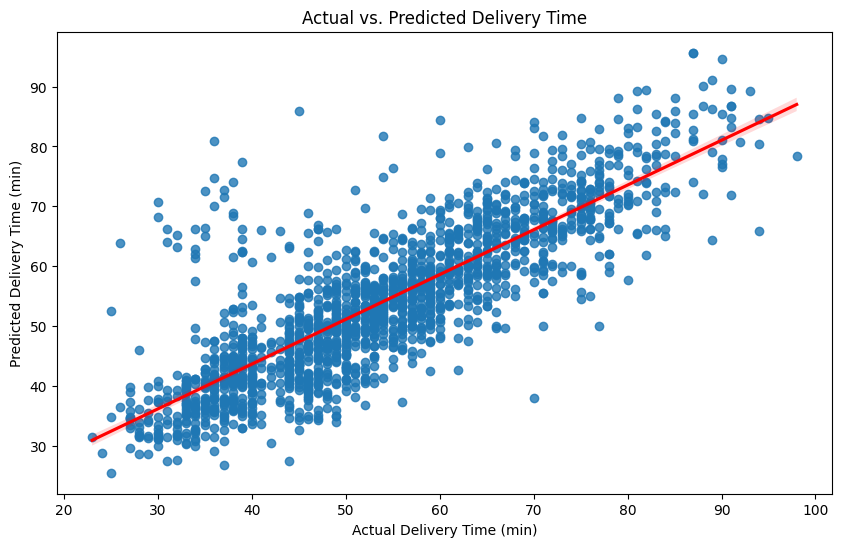

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred,line_kws={'color':'red'})
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Actual vs. Predicted Delivery Time")
plt.show()

# How these features are implemented in real swiggy and what they use to predict these kind of systems?

## Here is an article how swiggy using simple embedding method implement their feature of delivery time estimation.
https://bytes.swiggy.com/predicting-food-delivery-time-at-cart-cda23a84ba63